In [1]:
#Import modules
%matplotlib inline
import pandas as pd  #Pandas er en bibliotek for dataanalyse og manipulasjon.
import numpy as np   #NumPy er en bibliotek for numerisk beregning i Python.
from scipy import stats                #stats-modulen inneholder statistiske funksjoner og verktøy som kan brukes til å utføre ulike statistiske beregninger. For eksempel kan du bruke denne modulen til å utføre hypotesetesting, beregne sannsynlighetsfordelinger, generere tilfeldige tall og mer.
import matplotlib.pyplot as plt      #er en populær bibliotek for å lage grafer og diagrammer i Python.
import seaborn as sns        # Seaborn er en bibliotek for datavisualisering bygget på toppen av Matplotlib. Det gir enklere syntaks for å lage stilige og informative grafer og diagrammer.
import re                   #Med re-modulen kan du definere mønstre og søke etter dem i tekststrenger, erstatte tekst og utføre komplekse tekstoperasjoner.

In [3]:
#Denne linjen oppretter en variabel kalt file_path og tildeler den en strengverdi som er filbanen 
#til CSV-filen som skal leses. Merk at r-prefikset foran strengen indikerer at det er en "rå streng," 
#som betyr at Python skal behandle strengen uten å tolke spesialtegn som \n som en ny linje.

file_path = r"C:\Users\Hiwa\Desktop\Sjette semester\Intro_Til_AI\onsketmappe\My_lab_AI_Labs\Lab-2023-DAVE3625-main\Lab 2\data\Titanic.csv"

#Denne linjen bruker Pandas-biblioteket (pd) til å lese data fra en CSV-fil.sep=',': Dette argumentet spesifiserer at kolonneoppdelingen i CSV-filen er et komma (,). 
#Det betyr at hver kolonne i CSV-filen er separert med et komma.
df = pd.read_csv(file_path, sep=',')


              #df.head(1)-koden brukes til å vise de første radene av DataFrame-en (de første radene av dataene) 
              #for å få et innblikk i hvordan dataene ser ut.
df.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [4]:
                     #df.isna().sum() er en linje kode som brukes til å beregne og vise totalt antall Manglende verdier (missing values) for hver kolonne i DataFrame df.
df.isna().sum() 

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [5]:
#å fylle manglende verdier i kolonnene "Age" og "Fare" 

    #df["Age"]: Dette er en indekseringsoperasjon som henter ut kolonnen med navnet "Age" fra DataFrame df. 
    #Denne kolonnen inneholder alderen til passasjerene.
    #.fillna(): Dette er en Pandas-metode som brukes til å erstatte manglende verdier med en spesifisert verdi eller beregning. 
    #I dette tilfellet brukes den til å erstatte manglende verdier i "Age"-kolonnen.
    #df["Age"].median(): Dette er en beregning som finner medianverdien av "Age"-kolonnen. 
    #Medianen er midtpunktet i datasettet når det er sortert i stigende rekkefølge.
    #Resultatet av .fillna(df["Age"].median()) er at alle manglende verdier i "Age"-kolonnen blir erstattet med medianen av 
    #alderen i datasettet. Dette gjør at datasettet for "Age" er komplett uten manglende verdier.

df["Age"] = df["Age"].fillna(df["Age"].median())
df["Fare"] = df["Fare"].fillna(df["Fare"].median())

In [6]:
#Denne linjen med kode legger til en ny kolonne i DataFrame df kalt "HasCabin", 
#som angir om hver passasjer har eller ikke har en lugar (cabin).


# df['HasCabin'] lager ny kolonen HasCabin.
#df.Cabin.isnull() lager en liste True av alle Nan(tomt/manglende) verdi av kolonen Cabin
#ved bruke av "~" omventer vi alle true til fals og fals til true 

df['HasCabin'] = ~df.Cabin.isnull()
df.head()                               #henter de 5 første radene:

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False


In [10]:
#Lets add a new column called Title                     Adding a feature:
#velger kolonen name med vardiene. apply fonkjonen lamda som skal inholde verdiene(navnene). leter etter titelen ved 
#bruk av re.search. en space + en storbokstav med små bokstaver og en punktom til slutt. .group(1): Dette er en metode 
#som brukes på resultatet av re.search(...), og den henter den første gruppen som matcher mønsteret. 
#I dette tilfellet er den første gruppen tittelen til passasjeren.

df['Title'] = df.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1)) 


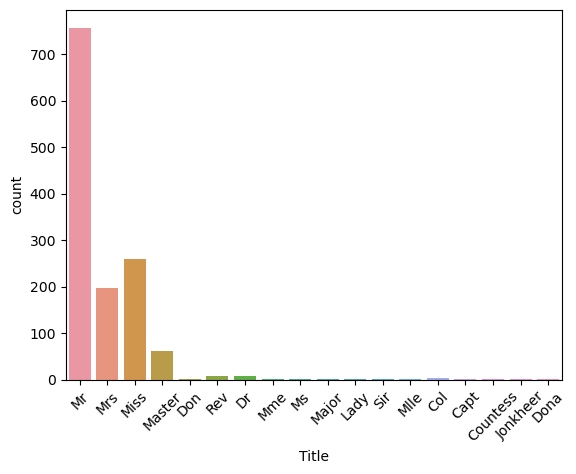

In [11]:
#lage et tellingsdiagram der x-aksen viser passasjerenes titler, og y-aksen viser antallet passasjerer med hver tittel.

sns.countplot(x='Title', data=df);
plt.xticks(rotation=45);

In [8]:
#value_counts()-metoden, som teller antall forekomster av hver unik verdi i den angitte kolonnen, og 
#deretter viser resultatene i synkende rekkefølge (fra høyeste til laveste antall).

df["Title"].value_counts()

Title
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64

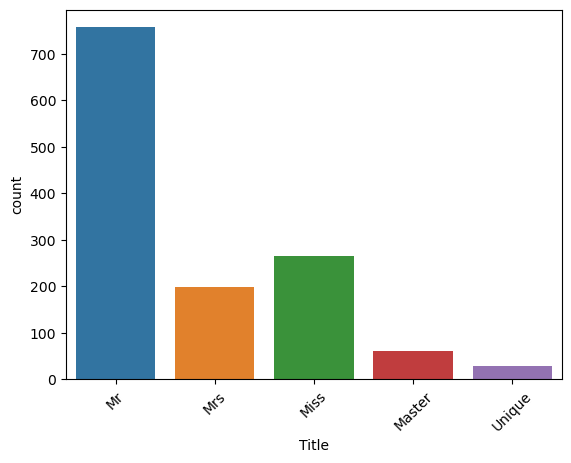

In [12]:
# Grouping titles to
df['Title'] = df['Title'].replace({'Mlle':'Miss', 'Mme':'Mrs', 'Ms':'Miss'})
df['Title'] = df['Title'].replace(['Don', 'Dona', 'Rev', 'Dr',
                                            'Major', 'Lady', 'Sir', 'Col', 'Capt', 'Countess', 'Jonkheer'],'Unique')
sns.countplot(x='Title', data=df);
plt.xticks(rotation=45);

Prepearing for binary data conversion

In [17]:
#Convert Age and Fare into categorical data.



# Creating numerical columns for age and fare
df['CatAge'] = pd.qcut(df.Age, q=4, labels=False )
df['CatFare']= pd.qcut(df.Fare, q=4, labels=False)
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin,Title,CatAge,CatFare
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,Mr,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,Mrs,3,3
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,Miss,1,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True,Mrs,2,3
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,Mr,2,1


In [11]:
#df = df.drop(["column1", ... , "columnN"], axis=1)

#Dropping columns that wont make sence in binary
df = df.drop(["Age", "Fare", "Cabin", "Name", "Ticket"], axis=1)
df.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,HasCabin,Title,CatAge,CatFare
0,1,3,male,1,0,S,False,Mr,0,0
1,2,1,female,1,0,C,True,Mrs,3,3
2,3,3,female,0,0,S,False,Miss,1,1
3,4,1,female,1,0,S,True,Mrs,2,3
4,5,3,male,0,0,S,False,Mr,2,1


In [12]:
# Converting to binary values

#kategoriske variabler blir konvertert til binære (0 eller 1) variabler.

df_dum = pd.get_dummies(df, drop_first=True)
df_dum.head()



,PassengerId,Pclass,SibSp,Parch,HasCabin,CatAge,CatFare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Unique
0,1,3,1,0,False,0,0,True,False,True,False,True,False,False
1,2,1,1,0,True,3,3,False,False,False,False,False,True,False
2,3,3,0,0,False,1,1,False,False,True,True,False,False,False
3,4,1,1,0,True,2,3,False,False,True,False,False,True,False
4,5,3,0,0,False,2,1,True,False,True,False,True,False,False
